In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re

from IPython.display import display
from ipywidgets import widgets

In [2]:
json_file_names = !ls data/coreutils_coverage/

In [3]:
function_coverage_info = list()
for json_file_name in json_file_names:
    with open(f"data/coreutils_coverage/{json_file_name}", "r") as json_file:
        json_contents = json.load(json_file)
    for source_file in json_contents["files"]:
        for function in source_file["functions"]:
            info = {
                "executable_name": json_contents["data_file"],
                "source_file": source_file["file"],
                "function_name": function["name"],
                "basic_blocks": function["blocks"],
                "executed_basic_blocks": function["blocks_executed"],
                "basic_block_coverage": function["blocks_executed"] / function["blocks"] if function["blocks"] else None,
                "number_of_times_executed": function["execution_count"],
                "number_of_lines": function["end_line"] - function["start_line"]
            }
            if info["basic_blocks"] == 0 or info["number_of_lines"] == 0:
                continue
            function_coverage_info.append(info)

In [4]:
function_coverage_df = pd.DataFrame(function_coverage_info)
function_coverage_df = function_coverage_df[function_coverage_df.function_name != "main"]

In [58]:
function_coverage_df.head()

,executable_name,source_file,function_name,basic_blocks,executed_basic_blocks,basic_block_coverage,number_of_times_executed,number_of_lines
0,src/basename,/home/luiz/Desktop/coreutils/src/basename.c,usage,11,11,1.0,14,37
1,src/basename,/home/luiz/Desktop/coreutils/src/basename.c,remove_suffix,8,8,1.0,15,13
2,src/basename,/home/luiz/Desktop/coreutils/src/basename.c,perform_basename,11,11,1.0,49,17
4,src/basename,/home/luiz/Desktop/coreutils/src/system.h,initialize_exit_failure,3,0,0.0,0,4
5,src/basename,/home/luiz/Desktop/coreutils/src/system.h,select_plural,2,0,0.0,0,6


In [30]:
function_executions_df = function_coverage_df[["source_file", "function_name", "number_of_times_executed"]].groupby(by=["source_file", "function_name"]).sum()
function_executions_df.head()

number_of_times_executed
source_file                                function_name                             
/home/luiz/Desktop/coreutils/lib/gettext.h dcnpgettext_expr                         0
                                           dcpgettext_expr                          0
                                           npgettext_aux                            0
                                           pgettext_aux                             0
/home/luiz/Desktop/coreutils/lib/randint.h randint_choose                        5038

In [59]:
function_coverage_df[["source_file", "function_name"]].groupby(by=["source_file", "function_name"]).count()

Empty DataFrame
Columns: []
Index: [(/home/luiz/Desktop/coreutils/lib/gettext.h, dcnpgettext_expr), (/home/luiz/Desktop/coreutils/lib/gettext.h, dcpgettext_expr), (/home/luiz/Desktop/coreutils/lib/gettext.h, npgettext_aux), (/home/luiz/Desktop/coreutils/lib/gettext.h, pgettext_aux), (/home/luiz/Desktop/coreutils/lib/randint.h, randint_choose), (/home/luiz/Desktop/coreutils/lib/smack.h, is_smack_enabled), (/home/luiz/Desktop/coreutils/lib/smack.h, smack_new_label_from_self), (/home/luiz/Desktop/coreutils/lib/smack.h, smack_set_label_for_self), (/home/luiz/Desktop/coreutils/src/basename.c, perform_basename), (/home/luiz/Desktop/coreutils/src/basename.c, remove_suffix), (/home/luiz/Desktop/coreutils/src/basename.c, usage), (/home/luiz/Desktop/coreutils/src/cat.c, cat), (/home/luiz/Desktop/coreutils/src/cat.c, copy_cat), (/home/luiz/Desktop/coreutils/src/cat.c, next_line_num), (/home/luiz/Desktop/coreutils/src/cat.c, simple_cat), (/home/luiz/Desktop/coreutils/src/cat.c, usage), (/home/luiz/Desktop/coreutils/src/cat.c, write_pending), (/home/luiz/Desktop/coreutils/src/chcon.c, change_file_context), (/home/luiz/Desktop/coreutils/src/chcon.c, compute_context_from_mask), (/home/luiz/Desktop/coreutils/src/chcon.c, process_file), (/home/luiz/Desktop/coreutils/src/chcon.c, process_files), (/home/luiz/Desktop/coreutils/src/chcon.c, usage), (/home/luiz/Desktop/coreutils/src/chmod.c, describe_change), (/home/luiz/Desktop/coreutils/src/chmod.c, mode_changed), (/home/luiz/Desktop/coreutils/src/chmod.c, process_file), (/home/luiz/Desktop/coreutils/src/chmod.c, process_files), (/home/luiz/Desktop/coreutils/src/chmod.c, usage), (/home/luiz/Desktop/coreutils/src/chown.c, usage), (/home/luiz/Desktop/coreutils/src/chroot.c, is_root), (/home/luiz/Desktop/coreutils/src/chroot.c, parse_additional_groups), (/home/luiz/Desktop/coreutils/src/chroot.c, usage), (/home/luiz/Desktop/coreutils/src/comm.c, check_order), (/home/luiz/Desktop/coreutils/src/comm.c, compare_files), (/home/luiz/Desktop/coreutils/src/comm.c, usage), (/home/luiz/Desktop/coreutils/src/comm.c, writeline), (/home/luiz/Desktop/coreutils/src/cp.c, cp_option_init), (/home/luiz/Desktop/coreutils/src/cp.c, decode_preserve_arg), (/home/luiz/Desktop/coreutils/src/cp.c, do_copy), (/home/luiz/Desktop/coreutils/src/cp.c, make_dir_parents_private), (/home/luiz/Desktop/coreutils/src/cp.c, re_protect), (/home/luiz/Desktop/coreutils/src/cp.c, usage), (/home/luiz/Desktop/coreutils/src/csplit.c, check_for_offset), (/home/luiz/Desktop/coreutils/src/csplit.c, check_format_conv_type), (/home/luiz/Desktop/coreutils/src/csplit.c, cleanup), (/home/luiz/Desktop/coreutils/src/csplit.c, cleanup_fatal), (/home/luiz/Desktop/coreutils/src/csplit.c, clear_line_control), (/home/luiz/Desktop/coreutils/src/csplit.c, close_output_file), (/home/luiz/Desktop/coreutils/src/csplit.c, create_output_file), (/home/luiz/Desktop/coreutils/src/csplit.c, delete_all_files), (/home/luiz/Desktop/coreutils/src/csplit.c, dump_rest_of_file), (/home/luiz/Desktop/coreutils/src/csplit.c, extract_regexp), (/home/luiz/Desktop/coreutils/src/csplit.c, find_line), (/home/luiz/Desktop/coreutils/src/csplit.c, free_buffer), (/home/luiz/Desktop/coreutils/src/csplit.c, get_first_line_in_buffer), (/home/luiz/Desktop/coreutils/src/csplit.c, get_format_flags), (/home/luiz/Desktop/coreutils/src/csplit.c, get_new_buffer), (/home/luiz/Desktop/coreutils/src/csplit.c, handle_line_error), (/home/luiz/Desktop/coreutils/src/csplit.c, interrupt_handler), (/home/luiz/Desktop/coreutils/src/csplit.c, keep_new_line), (/home/luiz/Desktop/coreutils/src/csplit.c, load_buffer), (/home/luiz/Desktop/coreutils/src/csplit.c, make_filename), (/home/luiz/Desktop/coreutils/src/csplit.c, max_out), (/home/luiz/Desktop/coreutils/src/csplit.c, new_control_record), (/home/luiz/Desktop/coreutils/src/csplit.c, new_line_control), (/home/luiz/Desktop/coreutils/src/csplit.c, no_more_lines), (/home/luiz/Desktop/coreutils/src/csplit.c, parse_patterns), (/home/luiz/Desktop/coreutils/src/c

In [60]:
function_coverage_df["source_file"].nunique()

100

In [61]:
function_coverage_df[
    ["source_file", "function_name", "number_of_lines", "basic_blocks"]
].groupby(by=["source_file", "function_name"]).mean().describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_lines,1111.0,36.259226,51.464563,2.0,7.0,19.0,41.0,572.0
basic_blocks,1111.0,19.710171,26.567519,1.0,6.0,11.0,22.0,290.0


/var/folders/lw/xtj0hj3d0_53y1vg5stnhm880000gn/T/ipykernel_3676/1292094271.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "number_of_functions":  (function_executions_df == 0).sum()[0]
/var/folders/lw/xtj0hj3d0_53y1vg5stnhm880000gn/T/ipykernel_3676/1292094271.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "number_of_functions":  (function_executions_df > 0).sum()[0]


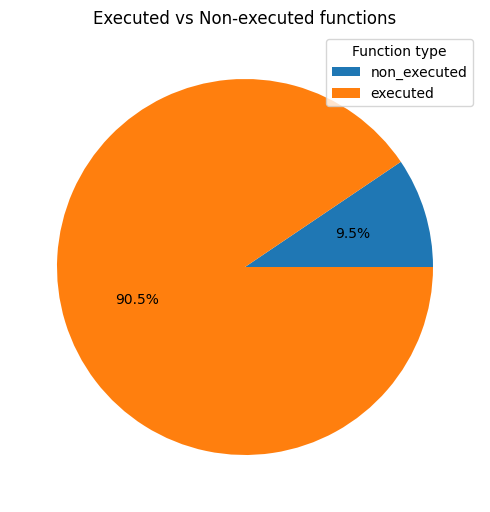

,type,number_of_functions
0,non_executed,105
1,executed,1006


In [65]:
function_executions_df = function_coverage_df[
    ["source_file", "function_name", "number_of_times_executed"]
].groupby(by=["source_file", "function_name"]).sum()
executed_vs_non_executed_counts = pd.DataFrame([
    {
        "type": "non_executed",
        "number_of_functions":  (function_executions_df == 0).sum()[0]
    },
    {
        "type": "executed",
        "number_of_functions":  (function_executions_df > 0).sum()[0]
    },
]
)

plt.figure(figsize=(5, 5))
plt.pie(executed_vs_non_executed_counts["number_of_functions"], autopct='%1.1f%%')
plt.legend(executed_vs_non_executed_counts["type"], title='Function type', loc='upper right')
plt.tight_layout()
plt.title("Executed vs Non-executed functions")
plt.show()

executed_vs_non_executed_counts

## Non-executed functions

In [68]:
temp = function_coverage_df[
    ["source_file", "function_name", "basic_blocks", "number_of_lines", "number_of_times_executed"]
].groupby(by=["source_file", "function_name"]).agg({
    "basic_blocks": "mean",
    "number_of_lines": "mean",
    "number_of_times_executed": "sum"
})
non_executed_functions_df = temp[temp["number_of_times_executed"] == 0][["basic_blocks", "number_of_lines"]]
non_executed_functions_df.head()

basic_blocks  \
source_file                                function_name                             
/home/luiz/Desktop/coreutils/lib/gettext.h dcnpgettext_expr                   19.0   
                                           dcpgettext_expr                    11.0   
                                           npgettext_aux                       9.0   
                                           pgettext_aux                        4.0   
/home/luiz/Desktop/coreutils/lib/smack.h   smack_new_label_from_self           2.0   

                                                                      number_of_lines  
source_file                                function_name                               
/home/luiz/Desktop/coreutils/lib/gettext.h dcnpgettext_expr                      33.0  
                                           dcpgettext_expr                       32.0  
                                           npgettext_aux                         11.0  
                                           pgettext_aux                           9.0  
/home/luiz/Desktop/coreutils/lib/smack.h   smack_new_label_from_self              3.0

In [69]:
non_executed_functions_df[["basic_blocks", "number_of_lines"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
basic_blocks,105.0,12.514286,18.703719,1.0,3.0,6.0,14.0,135.0
number_of_lines,105.0,22.209524,41.240079,3.0,5.0,9.0,22.0,372.0


In [70]:
number_of_non_executed_functions_per_file = (
    non_executed_functions_df.groupby("source_file").size().sort_values(ascending=False)
)
number_of_non_executed_functions_per_file

source_file
/home/luiz/Desktop/coreutils/src/ls.c                   12
/home/luiz/Desktop/coreutils/src/who.c                   9
/home/luiz/Desktop/coreutils/src/pwd.c                   6
/home/luiz/Desktop/coreutils/src/od.c                    5
/home/luiz/Desktop/coreutils/src/make-prime-list.c       5
/home/luiz/Desktop/coreutils/lib/gettext.h               4
/home/luiz/Desktop/coreutils/src/expr.c                  4
/home/luiz/Desktop/coreutils/src/sort.c                  4
/home/luiz/Desktop/coreutils/src/ptx.c                   4
/home/luiz/Desktop/coreutils/src/chcon.c                 4
/usr/include/aarch64-linux-gnu/bits/uintn-identity.h     3
/usr/include/aarch64-linux-gnu/bits/byteswap.h           3
/home/luiz/Desktop/coreutils/src/test.c                  3
/home/luiz/Desktop/coreutils/src/pathchk.c               3
/home/luiz/Desktop/coreutils/src/system.h                3
/home/luiz/Desktop/coreutils/src/stat.c                  3
/home/luiz/Desktop/coreutils/src/csplit.c   

In [77]:
non_executed_functions_df.reset_index()["function_name"].unique()

array(['dcnpgettext_expr', 'dcpgettext_expr', 'npgettext_aux',
       'pgettext_aux', 'smack_new_label_from_self',
       'smack_set_label_for_self', 'change_file_context',
       'compute_context_from_mask', 'process_file', 'process_files',
       'parse_additional_groups', 'interrupt_handler', 'regexp_error',
       'xalloc_die', 'res_width', 'advance_input_after_read_error',
       'replace_invalid_chars', 'fill_mount_table',
       'mount_point_in_fts_cycle', 'getsize', 'mbs_logical_cspn',
       'mbs_logical_substr', 'mbs_offset_to_chars', 'usage',
       'diagnose_copy_fd_failure', 'write_header',
       'assert_matching_dev_ino', 'cmp_btime', 'cmp_extension',
       'cmp_size', 'off_cmp', 'rev_xstrcoll_df_version',
       'rev_xstrcoll_version', 'sighandler', 'signal_init',
       'stat_for_ino', 'stophandler', 'xstrcoll_df_version', 'binvert',
       'output_primes', 'print_wide_uint', 'process_prime', 'xalloc',
       'dump_strings', 'format_address_label', 'format_address_par

## Executed functions

In [5]:
temp = function_coverage_df[
    [
        "source_file",
        "function_name",
        "basic_blocks",
        "basic_block_coverage",
        "number_of_times_executed",
        "number_of_lines"
    ]
].groupby(by=["source_file", "function_name"]).agg({
    "basic_blocks": "mean",
    "basic_block_coverage": "max",
    "number_of_lines": "mean",
    "number_of_times_executed": "sum"
})
executed_functions_df = temp[temp["number_of_times_executed"] > 0]
executed_functions_df.head()

basic_blocks  \
source_file                                 function_name                    
/home/luiz/Desktop/coreutils/lib/randint.h  randint_choose             2.0   
/home/luiz/Desktop/coreutils/lib/smack.h    is_smack_enabled           2.0   
/home/luiz/Desktop/coreutils/src/basename.c perform_basename          11.0   
                                            remove_suffix              8.0   
                                            usage                     11.0   

                                                              basic_block_coverage  \
source_file                                 function_name                            
/home/luiz/Desktop/coreutils/lib/randint.h  randint_choose                     1.0   
/home/luiz/Desktop/coreutils/lib/smack.h    is_smack_enabled                   1.0   
/home/luiz/Desktop/coreutils/src/basename.c perform_basename                   1.0   
                                            remove_suffix                      1.0   
                                            usage                              1.0   

                                                              number_of_lines  \
source_file                                 function_name                       
/home/luiz/Desktop/coreutils/lib/randint.h  randint_choose                3.0   
/home/luiz/Desktop/coreutils/lib/smack.h    is_smack_enabled              7.0   
/home/luiz/Desktop/coreutils/src/basename.c perform_basename             17.0   
                                            remove_suffix                13.0   
                                            usage                        37.0   

                                                              number_of_times_executed  
source_file                                 function_name                               
/home/luiz/Desktop/coreutils/lib/randint.h  randint_choose                        5038  
/home/luiz/Desktop/coreutils/lib/smack.h    is_smack_enabled                       447  
/home/luiz/Desktop/coreutils/src/basename.c perform_basename                        49  
                                            remove_suffix                           15  
                                            usage                                   14

In [87]:
executed_functions_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
basic_blocks,1006.0,20.461233,27.155128,1.000000,6.000000,12.000000,22.0,290.0
basic_block_coverage,1006.0,0.862232,0.191974,0.037037,0.782609,0.961481,1.0,1.0
number_of_lines,1006.0,37.725646,52.216353,2.000000,8.000000,20.000000,43.0,572.0
number_of_times_executed,1006.0,43986.105368,262184.071973,1.000000,17.000000,141.000000,1264.5,2623599.0


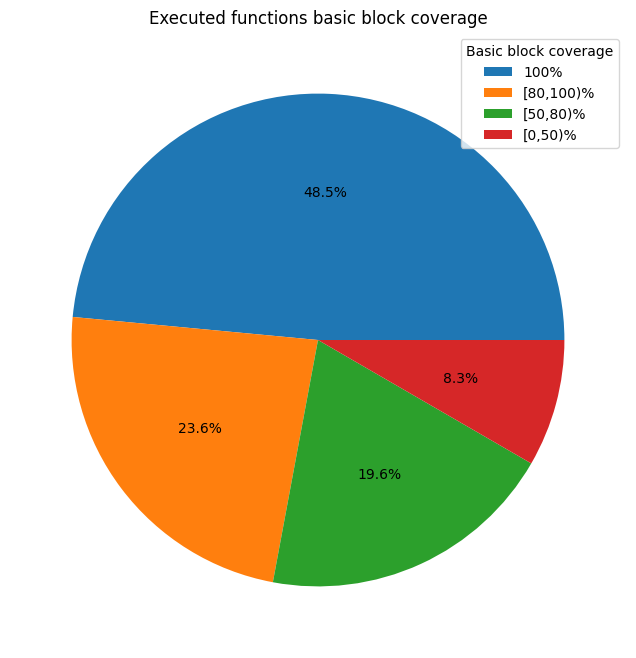

basic_block_coverage
100%         488
[80,100)%    237
[50,80)%     197
[0,50)%       84
Name: count, dtype: int64

In [88]:
bins = [0, 0.5, 0.8, 0.99, 1]

coverage_bins = (
    pd.cut(
        executed_functions_df["basic_block_coverage"], bins=bins, labels=["[0,50)%", "[50,80)%", "[80,100)%", "100%"]).value_counts()
)

plt.figure(figsize=(8, 8))
plt.pie(coverage_bins, autopct='%1.1f%%')

plt.legend(coverage_bins.index, title='Basic block coverage', loc='upper right')

plt.title("Executed functions basic block coverage")
plt.show()

coverage_bins.sort_values(ascending=False)

In [15]:
function_coverage_df[
    [
        "executable_name",
        "source_file",
        "function_name",
        "number_of_times_executed",
    ]
].groupby(by=["executable_name", "source_file", "function_name"]).agg({
    "number_of_times_executed": "sum"
}).groupby(by="executable_name").agg({
    "number_of_times_executed": lambda counts: sum(1 for count in counts if count > 0) / len(counts)
}).sort_values(by=["number_of_times_executed"], ascending=False).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_of_times_executed,91.0,0.23246,0.169338,0.0,0.092857,0.176471,0.318599,0.75188


In [25]:
execution_per_program_df = function_coverage_df[
    [
        "executable_name",
        "source_file",
        "function_name",
        "number_of_times_executed",
    ]
].groupby(by=["executable_name", "source_file", "function_name"]).agg({
    "number_of_times_executed": "sum"
}).groupby(by="executable_name").agg({
    "number_of_times_executed": lambda counts: sum(1 for count in counts if count > 0) / len(counts)
}).sort_values(by=["number_of_times_executed"], ascending=True)
execution_per_program_df.head(20)

,number_of_times_executed
executable_name,
src/make-prime-list,0.000000
src/getlimits,0.027778
src/uptime,0.054054
src/link,0.057143
src/hostid,0.057143
src/groups,0.057143
src/unlink,0.057143
src/false,0.057143
src/true,0.057143


In [24]:
execution_per_program_df[execution_per_program_df["number_of_times_executed"] > 0.20]

,number_of_times_executed
executable_name,
src/ln,0.205128
src/chmod,0.205128
src/mv,0.210526
src/pinky,0.222222
src/tac,0.225000
src/rmdir,0.230769
src/stdbuf,0.250000
src/cp,0.250000
src/paste,0.256410


In [14]:
function_coverage_df["executable_name"].unique().size

91

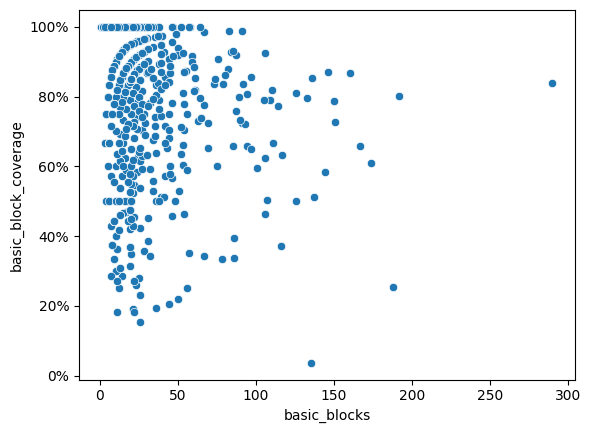

In [113]:
sns.scatterplot(data=executed_functions_df[["basic_blocks", "basic_block_coverage"]], x="basic_blocks", y="basic_block_coverage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

<Axes: xlabel='number_of_lines', ylabel='basic_blocks'>

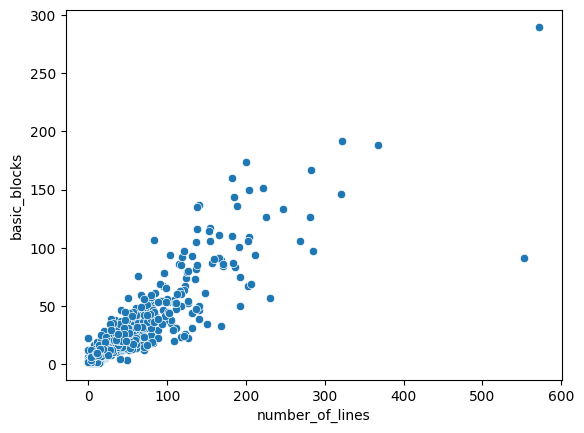

In [115]:
sns.scatterplot(data=executed_functions_df[["number_of_lines", "basic_blocks"]], x="number_of_lines", y="basic_blocks")

### Full-coverage functions

In [124]:
full_coverage_functions_df = executed_functions_df[executed_functions_df.basic_block_coverage == 1].drop(columns=["basic_block_coverage"])
full_coverage_functions_df.head()

,executable_name,source_file,function_name,basic_blocks,executed_basic_blocks,number_of_times_executed,number_of_lines
3152,src/sort,/home/luiz/Desktop/coreutils/src/sort.c,diff_reversed,5,5,2609248,3
339,src/csplit,/home/luiz/Desktop/coreutils/src/csplit.c,remove_line,15,15,2501173,44
332,src/csplit,/home/luiz/Desktop/coreutils/src/csplit.c,keep_new_line,7,7,2501147,22
3146,src/sort,/home/luiz/Desktop/coreutils/src/sort.c,key_numeric,7,7,2394482,3
983,src/factor,/home/luiz/Desktop/coreutils/src/factor.c,lbuf_putc,17,17,2340663,34


In [168]:
full_coverage_functions_df[["basic_blocks", "number_of_lines"]].describe().transpose().drop(columns=["count"])

,mean,std,min,25%,50%,75%,max
basic_blocks,7.532488,7.801006,1.0,2.0,5.0,10.0,64.0
number_of_lines,16.619651,24.125095,0.0,4.0,7.0,18.0,231.0


### Functions that only have basic types

In [192]:
coreutils_function_types_data = {
    "function_name": list(),
    "argument_types": list(),
    "return_type": list()
}
pattern = r"(.*),args:\[(.*)\],ret:(.*)"

with open('data/coreutils_function_types.csv', 'r') as file:
    for line in file:
        match = re.search(pattern, line)
        function_name = match.group(1)
        argument_types = match.group(2).split(";")[:-1]
        return_type = match.group(3)
        coreutils_function_types_data["function_name"].append(function_name)
        coreutils_function_types_data["argument_types"].append(argument_types)
        coreutils_function_types_data["return_type"].append(return_type)

In [196]:
non_primitive_function_names = set()
primitive_numerical_types = {"i1", "i8", "i16", "i32", "i64"}
for function_name, argument_types, return_type in zip(coreutils_function_types_data["function_name"], coreutils_function_types_data["argument_types"], coreutils_function_types_data["return_type"]):
    non_primitive_arguments = not set(argument_types).issubset(primitive_numerical_types)
    non_primitive_return_type = return_type not in primitive_numerical_types
    if non_primitive_arguments or non_primitive_return_type:
        non_primitive_function_names.add(function_name)
fully_primitive_function_names = set(coreutils_function_types_data["function_name"]) - non_primitive_function_names
print("Number of fully primitive functions:", len(fully_primitive_function_names))

Number of fully primitive functions: 273


In [201]:
executed_primitive_functions_df = executed_functions_df[executed_functions_df.function_name.isin(fully_primitive_function_names)]
executed_primitive_functions_df.head()

,executable_name,source_file,function_name,basic_blocks,executed_basic_blocks,basic_block_coverage,number_of_times_executed,number_of_lines
3152,src/sort,/home/luiz/Desktop/coreutils/src/sort.c,diff_reversed,5,5,1.000000,2609248,3
3194,src/sort,/home/luiz/Desktop/coreutils/src/system.h,to_uchar,2,2,1.000000,1131513,0
2490,src/pr,/home/luiz/Desktop/coreutils/src/pr.c,char_to_clump,35,26,0.742857,864005,92
3826,src/tr,/home/luiz/Desktop/coreutils/src/system.h,to_uchar,2,2,1.000000,824503,0
3228,src/split,/home/luiz/Desktop/coreutils/src/split.c,ignorable,6,6,1.000000,605310,3


In [207]:
executed_primitive_functions_df[["basic_blocks", "basic_block_coverage", "number_of_lines"]].describe().transpose().drop(columns=["count"])

,mean,std,min,25%,50%,75%,max
basic_blocks,14.086614,25.072284,2.000000,2.000000,7.0,13.0,167.0
basic_block_coverage,0.896676,0.175807,0.037037,0.845238,1.0,1.0,1.0
number_of_lines,20.551181,35.922471,0.000000,3.000000,7.0,22.5,282.0


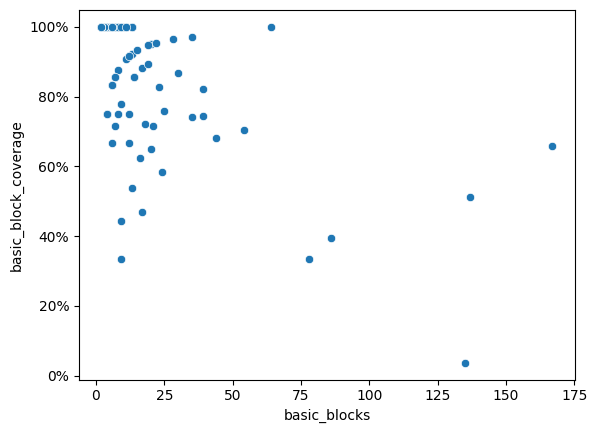

In [209]:
sns.scatterplot(data=executed_primitive_functions_df[["basic_blocks", "basic_block_coverage"]], x="basic_blocks", y="basic_block_coverage")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))